In [77]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import copy
import torch as tr

# import scripts
from src.plotter import rosenbrock_plot

dtype = tr.float32

In [78]:
folder = "./data"; os.listdir(folder)

['20_bo.pt', '20_adam.pt', '20_es.pt']

In [79]:
index = 2

In [80]:
files = f"{os.listdir(folder)[index]}"

In [81]:
obj = tr.load(os.path.join(folder, files))

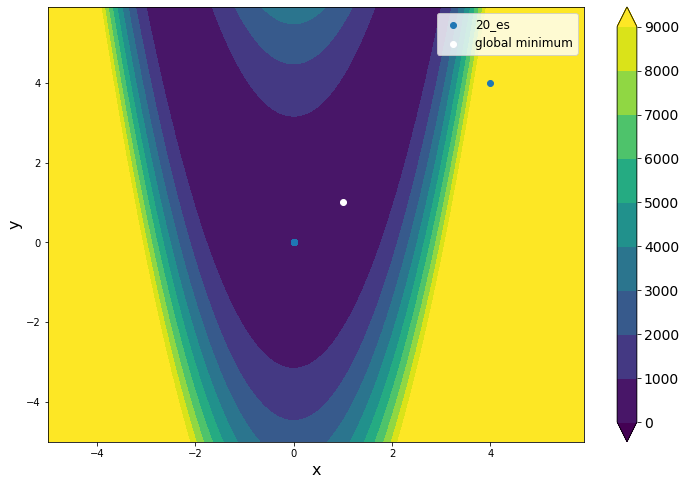

In [82]:
rosenbrock_plot.plot(np.arange(-5, 6,.1), np.arange(-5, 6,.1), [obj])

In [85]:
obj["x"]

tensor([[ 4.0000e+00,  4.0000e+00],
        [ 9.3627e-04, -2.4080e-04],
        [-1.7647e-04, -4.5435e-04],
        ...,
        [-2.8531e-04,  1.7460e-04],
        [-3.3667e-04, -1.4438e-04],
        [-5.0667e-05, -4.5343e-04]])